In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
def run_test(sps):
    # you might need to change this for your system
    subprocess.run(['./test', str(sps)],
                   env = {'LD_LIBRARY_PATH' : '/home/daniel/debian_testing_chroot/usr/lib/x86_64-linux-gnu/'})


In [3]:
sps = 4.1
run_test(sps)
interp_output = np.fromfile('interp_output.c64', dtype = 'complex64')
interp_derivative = np.fromfile('interp_derivative.c64', dtype = 'complex64')
ted_error = np.fromfile('ted_error.f32', dtype = 'float32')
n_poly = 100
sym = np.arange(interp_output.size)/(n_poly*sps)

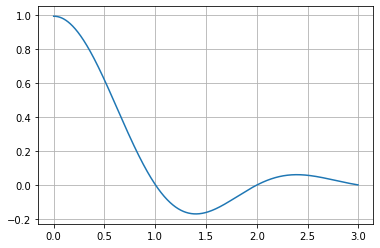

In [4]:
plt.plot(sym, interp_output.real)
plt.grid()

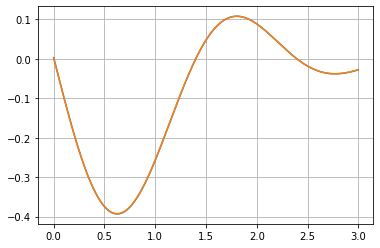

In [5]:
plt.plot(sym, interp_derivative.real)
derivative_scale = np.average(interp_derivative.real[:-1]/np.diff(interp_output.real))
plt.plot(sym[:-1], np.diff(interp_output.real)*derivative_scale)
plt.grid()

In [6]:
derivative_scale

118.28524

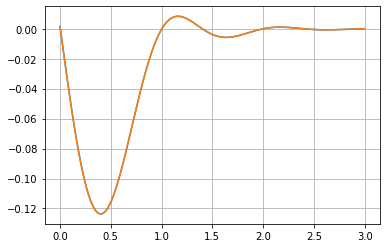

In [7]:
plt.plot(sym, ted_error)
plt.plot(sym[:-1], 0.5*np.diff(interp_output.real)*derivative_scale*interp_output.real[:-1])
plt.grid()

In [8]:
def compute_K_ted(sps):
    K_ted = np.empty_like(sps)
    for j,s in enumerate(sps):
        run_test(s)
        ted_error = np.fromfile('ted_error.f32', dtype = 'float32')
        K_ted[j] = (ted_error[0]-ted_error[1])*n_poly
    return K_ted

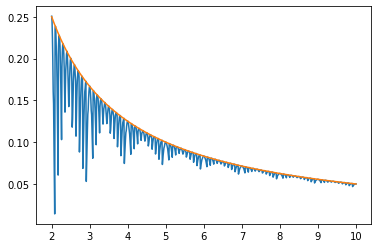

In [9]:
sps = np.arange(2,10.01,0.01)
plt.plot(sps, compute_K_ted(sps))
plt.plot(sps, 0.5/sps)

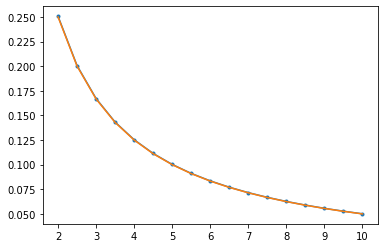

In [10]:
sps = np.arange(2,10.5,0.5)
plt.plot(sps, compute_K_ted(sps), '.-')
plt.plot(sps, 0.5/sps)

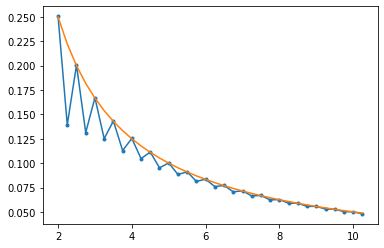

In [11]:
sps = np.arange(2,10.5,0.25)
plt.plot(sps, compute_K_ted(sps), '.-')
plt.plot(sps, 0.5/sps)

In [14]:
ideal_diff_taps = np.array([1,0,-1])

In [15]:
taps = np.array((0.0005481598200276494, 0.0006306453142315149, 0.0007125413976609707, 0.0007936169859021902, 0.0008736406452953815, 0.0009523816988803446, 0.0010296105174347758, 0.0011050993343815207, 0.0011786227114498615, 0.0012499585282057524, 0.0013188881566748023, 0.0013851973926648498, 0.0014486770378425717, 0.0015091235982254148, 0.0015663394005969167, 0.0016201342223212123, 0.0016703247092664242, 0.0017167357727885246, 0.0017592007061466575, 0.0017975617665797472, 0.00183167087379843, 0.0018613904248923063, 0.0018865927122533321, 0.0019071614369750023, 0.0019229915924370289, 0.0019339900463819504, 0.0019400757737457752, 0.001941180438734591, 0.0019372482784092426, 0.0019282371504232287, 0.0019141174852848053, 0.0018948742654174566, 0.001870505278930068, 0.0018410226330161095, 0.0018064524047076702, 0.0017668347572907805, 0.0017222237074747682, 0.0016726878238841891, 0.0016183091793209314, 0.0015591837000101805, 0.0014954217476770282, 0.001427146722562611, 0.0013544958783313632, 0.0012776192743331194, 0.0011966803576797247, 0.0011118545662611723, 0.0010233301436528563, 0.0009313068585470319, 0.0008359961211681366, 0.0007376201101578772, 0.0006364115397445858, 0.0005326131358742714, 0.00042647685040719807, 0.0003182635409757495, 0.00020824217062909156, 9.66892039286904e-05, -1.6112075172713958e-05, -0.00012987226364202797, -0.0002442965342197567, -0.00035908547579310834, -0.00047393576824106276, -0.0005885409191250801, -0.000702592427842319, -0.0008157800184562802, -0.0009277929784730077, -0.001038320711813867, -0.0011470535537227988, -0.0012536844005808234, -0.0013579080114141107, -0.001459423452615738, -0.0015579339815303683, -0.001653148327022791, -0.0017447813879698515, -0.0018325550481677055, -0.0019161992240697145, -0.0019954524468630552, -0.002070062793791294, -0.0021397883538156748, -0.0022043988574296236, -0.002263675443828106, -0.0023174115922302008, -0.0023654147516936064, -0.0024075054097920656, -0.002443518955260515, -0.002473306143656373, -0.0024967333301901817, -0.002513682469725609, -0.002524053445085883, -0.0025277624372392893, -0.0025247433222830296, -0.002514948369935155, -0.0024983477778732777, -0.002474930603057146, -0.0024447047617286444, -0.002407696796581149, -0.00236395257525146, -0.0023135372903198004, -0.0022565354593098164, -0.002193050691857934, -0.0021232059225440025, -0.0020471427123993635, -0.001965022413060069, -0.0018770237220451236, -0.0017833448946475983, -0.0016842015320435166, -0.001579827512614429, -0.0014704731293022633, -0.0013564059045165777, -0.0012379091931506991, -0.0011152824154123664, -0.0009888396598398685, -0.0008589091012254357, -0.0007258326513692737, -0.0005899647949263453, -0.00045167209464125335, -0.00031133199809119105, -0.00016933218284975737, -2.606943598948419e-05, 0.00011805124813690782, 0.00026261768653057516, 0.0004072115698363632, 0.0005514096119441092, 0.0006947843939997256, 0.0008369059069082141, 0.0009773423662409186, 0.0011156614637002349, 0.001251431880518794, 0.0013842236949130893, 0.0015136104775592685, 0.0016391701065003872, 0.0017604861641302705, 0.0018771484028548002, 0.0019887553062289953, 0.00209491397254169, 0.002195242326706648, 0.0022893701680004597, 0.002376939170062542, 0.0024576059076935053, 0.002531041856855154, 0.002596934325993061, 0.002654988318681717, 0.0027049267664551735, 0.002746492624282837, 0.002779449103400111, 0.002803579904139042, 0.0028186922427266836, 0.0028246149886399508, 0.0028212021570652723, 0.00280833151191473, 0.002785906894132495, 0.002753857057541609, 0.002712138229981065, 0.0026607331819832325, 0.0025996523909270763, 0.002528934273868799, 0.002448644954711199, 0.0023588798940181732, 0.002259762492030859, 0.0021514445543289185, 0.0020341076888144016, 0.001907961443066597, 0.001773244235664606, 0.0016302225412800908, 0.0014791914727538824, 0.0013204736169427633, 0.0011544185690581799, 0.0009814032819122076, 0.0008018306689336896, 0.0006161291967146099, 0.00042475215741433203, 0.00022817689750809222, 2.6903806428890675e-05, -0.00017854456382337958, -0.0003876245755236596, -0.0005997726111672819, -0.0008144061430357397, -0.0010309253120794892, -0.001248713699169457, -0.00146714027505368, -0.0016855603316798806, -0.0019033175194635987, -0.002119744662195444, -0.0023341658525168896, -0.00254589831456542, -0.0027542535681277514, -0.0029585394077003, -0.0031580612994730473, -0.003352124709635973, -0.0035400374326854944, -0.0037211093585938215, -0.003894656663760543, -0.004060002975165844, -0.004216479603201151, -0.004363431129604578, -0.004500212613493204, -0.004626196809113026, -0.004740770440548658, -0.004843340255320072, -0.004933333955705166, -0.005010200198739767, -0.005073413718491793, -0.005122474394738674, -0.0051569086499512196, -0.005176275037229061, -0.005180160980671644, -0.005168187897652388, -0.005140011664479971, -0.005095323547720909, -0.005033852998167276, -0.004955367185175419, -0.0048596737906336784, -0.004746622871607542, -0.00461610546335578, -0.004468057304620743, -0.00430245790630579, -0.004119332414120436, -0.0039187525399029255, -0.0037008370272815228, -0.0034657518845051527, -0.0032137115485966206, -0.0029449781868606806, -0.0026598633266985416, -0.00235872738994658, -0.002041978994384408, -0.0017100770492106676, -0.0013635278446599841, -0.0010028865654021502, -0.0006287563592195511, -0.00024178787134587765, 0.00015732162864878774, 0.000567828887142241, 0.0009889454813674092, 0.001419838983565569, 0.001859634299762547, 0.0023074145428836346, 0.0027622224297374487, 0.003223062725737691, 0.0036889021284878254, 0.004158672410994768, 0.004631272051483393, 0.005105568096041679, 0.005580398254096508, 0.006054571829736233, 0.006526874843984842, 0.006996069103479385, 0.007460898254066706, 0.00792008638381958, 0.008372343145310879, 0.008816367015242577, 0.009250844828784466, 0.00967445969581604, 0.010085889138281345, 0.010483810678124428, 0.010866903699934483, 0.011233854107558727, 0.011583355255424976, 0.011914112605154514, 0.012224847450852394, 0.012514297850430012, 0.012781224213540554, 0.013024413026869297, 0.013242674060165882, 0.013434854336082935, 0.01359983067959547, 0.013736519031226635, 0.01384387630969286, 0.013920902274549007, 0.013966646045446396, 0.013980205170810223, 0.013960730284452438, 0.013907426968216896, 0.013819563202559948, 0.013696464709937572, 0.01353752426803112, 0.013342202641069889, 0.0131100257858634, 0.012840594165027142, 0.012533584609627724, 0.012188747525215149, 0.011805913411080837, 0.011384992860257626, 0.010925978422164917, 0.01042894646525383, 0.009894059970974922, 0.00932157039642334, 0.008711813017725945, 0.008065215311944485, 0.007382294163107872, 0.006663657259196043, 0.0059100049547851086, 0.005122127011418343, 0.004300907254219055, 0.0034473203122615814, 0.002562433248385787, 0.0016474047442898154, 0.0007034839363768697, -0.0002679892349988222, -0.0012655856553465128, -0.0022877880837768316, -0.0033329918514937162, -0.004399506840854883, -0.005485559813678265, -0.006589295342564583, -0.007708776276558638, -0.008841990493237972, -0.009986848570406437, -0.011141188442707062, -0.012302780523896217, -0.013469325378537178, -0.01463845930993557, -0.015807760879397392, -0.01697474718093872, -0.01813688687980175, -0.019291596487164497, -0.020436245948076248, -0.021568162366747856, -0.02268463559448719, -0.023782925680279732, -0.024860259145498276, -0.025913838297128677, -0.02694084495306015, -0.02793845534324646, -0.028903817757964134, -0.029834091663360596, -0.03072642721235752, -0.031577978283166885, -0.03238591551780701, -0.0331474207341671, -0.03385968878865242, -0.03451995551586151, -0.03512547165155411, -0.035673532634973526, -0.03616146743297577, -0.036586660891771317, -0.03694654628634453, -0.037238605320453644, -0.03746039420366287, -0.0376095250248909, -0.03768368810415268, -0.037680648267269135, -0.037598252296447754, -0.03743443265557289, -0.03718721494078636, -0.03685472160577774, -0.036435168236494064, -0.03592688962817192, -0.03532830998301506, -0.03463797643780708, -0.03385455906391144, -0.03297683596611023, -0.03200371935963631, -0.03093424066901207, -0.02976757101714611, -0.02850300632417202, -0.027139980345964432, -0.025678075850009918, -0.02411700040102005, -0.022456619888544083, -0.020696936175227165, -0.018838103860616684, -0.016880422830581665, -0.014824344776570797, -0.012670471332967281, -0.010419555939733982, -0.008072503842413425, -0.0056303720921278, -0.003094371408224106, -0.00046586323878727853, 0.002253639278933406, 0.005062473006546497, 0.007958822883665562, 0.010940730571746826, 0.014006086625158787, 0.017152637243270874, 0.0203779898583889, 0.02367960661649704, 0.027054816484451294, 0.030500810593366623, 0.03401464968919754, 0.03759326413273811, 0.04123346880078316, 0.04493194445967674, 0.048685260117053986, 0.05248987674713135, 0.05634213984012604, 0.060238298028707504, 0.06417450308799744, 0.06814680248498917, 0.07215117663145065, 0.07618348300457001, 0.08023955672979355, 0.08431510627269745, 0.08840582519769669, 0.09250731766223907, 0.09661513566970825, 0.10072478652000427, 0.1048317551612854, 0.10893148183822632, 0.11301936209201813, 0.11709079146385193, 0.12114114314317703, 0.12516579031944275, 0.12916012108325958, 0.13311947882175446, 0.13703925907611847, 0.1409149020910263, 0.14474181830883026, 0.1485155075788498, 0.15223145484924316, 0.155885249376297, 0.1594725102186203, 0.16298890113830566, 0.16643016040325165, 0.16979216039180756, 0.1730707585811615, 0.17626196146011353, 0.17936187982559204, 0.18236666917800903, 0.18527264893054962, 0.1880762130022049, 0.1907738894224167, 0.19336232542991638, 0.19583828747272491, 0.19819869101047516, 0.20044057071208954, 0.2025611251592636, 0.20455768704414368, 0.20642778277397156, 0.20816898345947266, 0.20977912843227386, 0.21125619113445282, 0.2125982940196991, 0.2138037532567978, 0.21487101912498474, 0.21579872071743011, 0.21658572554588318, 0.21723100543022156, 0.2177337259054184, 0.21809327602386475, 0.2183091938495636, 0.21838121116161346, 0.2183091938495636, 0.21809327602386475, 0.2177337259054184, 0.21723100543022156, 0.21658572554588318, 0.21579872071743011, 0.21487101912498474, 0.2138037532567978, 0.2125982940196991, 0.21125619113445282, 0.20977912843227386, 0.20816898345947266, 0.20642778277397156, 0.20455768704414368, 0.2025611251592636, 0.20044057071208954, 0.19819869101047516, 0.19583828747272491, 0.19336232542991638, 0.1907738894224167, 0.1880762130022049, 0.18527264893054962, 0.18236666917800903, 0.17936187982559204, 0.17626196146011353, 0.1730707585811615, 0.16979216039180756, 0.16643016040325165, 0.16298890113830566, 0.1594725102186203, 0.155885249376297, 0.15223145484924316, 0.1485155075788498, 0.14474181830883026, 0.1409149020910263, 0.13703925907611847, 0.13311947882175446, 0.12916012108325958, 0.12516579031944275, 0.12114114314317703, 0.11709079146385193, 0.11301936209201813, 0.10893148183822632, 0.1048317551612854, 0.10072478652000427, 0.09661513566970825, 0.09250731766223907, 0.08840582519769669, 0.08431510627269745, 0.08023955672979355, 0.07618348300457001, 0.07215117663145065, 0.06814680248498917, 0.06417450308799744, 0.060238298028707504, 0.05634213984012604, 0.05248987674713135, 0.048685260117053986, 0.04493194445967674, 0.04123346880078316, 0.03759326413273811, 0.03401464968919754, 0.030500810593366623, 0.027054816484451294, 0.02367960661649704, 0.0203779898583889, 0.017152637243270874, 0.014006086625158787, 0.010940730571746826, 0.007958822883665562, 0.005062473006546497, 0.002253639278933406, -0.00046586323878727853, -0.003094371408224106, -0.0056303720921278, -0.008072503842413425, -0.010419555939733982, -0.012670471332967281, -0.014824344776570797, -0.016880422830581665, -0.018838103860616684, -0.020696936175227165, -0.022456619888544083, -0.02411700040102005, -0.025678075850009918, -0.027139980345964432, -0.02850300632417202, -0.02976757101714611, -0.03093424066901207, -0.03200371935963631, -0.03297683596611023, -0.03385455906391144, -0.03463797643780708, -0.03532830998301506, -0.03592688962817192, -0.036435168236494064, -0.03685472160577774, -0.03718721494078636, -0.03743443265557289, -0.037598252296447754, -0.037680648267269135, -0.03768368810415268, -0.0376095250248909, -0.03746039420366287, -0.037238605320453644, -0.03694654628634453, -0.036586660891771317, -0.03616146743297577, -0.035673532634973526, -0.03512547165155411, -0.03451995551586151, -0.03385968878865242, -0.0331474207341671, -0.03238591551780701, -0.031577978283166885, -0.03072642721235752, -0.029834091663360596, -0.028903817757964134, -0.02793845534324646, -0.02694084495306015, -0.025913838297128677, -0.024860259145498276, -0.023782925680279732, -0.02268463559448719, -0.021568162366747856, -0.020436245948076248, -0.019291596487164497, -0.01813688687980175, -0.01697474718093872, -0.015807760879397392, -0.01463845930993557, -0.013469325378537178, -0.012302780523896217, -0.011141188442707062, -0.009986848570406437, -0.008841990493237972, -0.007708776276558638, -0.006589295342564583, -0.005485559813678265, -0.004399506840854883, -0.0033329918514937162, -0.0022877880837768316, -0.0012655856553465128, -0.0002679892349988222, 0.0007034839363768697, 0.0016474047442898154, 0.002562433248385787, 0.0034473203122615814, 0.004300907254219055, 0.005122127011418343, 0.0059100049547851086, 0.006663657259196043, 0.007382294163107872, 0.008065215311944485, 0.008711813017725945, 0.00932157039642334, 0.009894059970974922, 0.01042894646525383, 0.010925978422164917, 0.011384992860257626, 0.011805913411080837, 0.012188747525215149, 0.012533584609627724, 0.012840594165027142, 0.0131100257858634, 0.013342202641069889, 0.01353752426803112, 0.013696464709937572, 0.013819563202559948, 0.013907426968216896, 0.013960730284452438, 0.013980205170810223, 0.013966646045446396, 0.013920902274549007, 0.01384387630969286, 0.013736519031226635, 0.01359983067959547, 0.013434854336082935, 0.013242674060165882, 0.013024413026869297, 0.012781224213540554, 0.012514297850430012, 0.012224847450852394, 0.011914112605154514, 0.011583355255424976, 0.011233854107558727, 0.010866903699934483, 0.010483810678124428, 0.010085889138281345, 0.00967445969581604, 0.009250844828784466, 0.008816367015242577, 0.008372343145310879, 0.00792008638381958, 0.007460898254066706, 0.006996069103479385, 0.006526874843984842, 0.006054571829736233, 0.005580398254096508, 0.005105568096041679, 0.004631272051483393, 0.004158672410994768, 0.0036889021284878254, 0.003223062725737691, 0.0027622224297374487, 0.0023074145428836346, 0.001859634299762547, 0.001419838983565569, 0.0009889454813674092, 0.000567828887142241, 0.00015732162864878774, -0.00024178787134587765, -0.0006287563592195511, -0.0010028865654021502, -0.0013635278446599841, -0.0017100770492106676, -0.002041978994384408, -0.00235872738994658, -0.0026598633266985416, -0.0029449781868606806, -0.0032137115485966206, -0.0034657518845051527, -0.0037008370272815228, -0.0039187525399029255, -0.004119332414120436, -0.00430245790630579, -0.004468057304620743, -0.00461610546335578, -0.004746622871607542, -0.0048596737906336784, -0.004955367185175419, -0.005033852998167276, -0.005095323547720909, -0.005140011664479971, -0.005168187897652388, -0.005180160980671644, -0.005176275037229061, -0.0051569086499512196, -0.005122474394738674, -0.005073413718491793, -0.005010200198739767, -0.004933333955705166, -0.004843340255320072, -0.004740770440548658, -0.004626196809113026, -0.004500212613493204, -0.004363431129604578, -0.004216479603201151, -0.004060002975165844, -0.003894656663760543, -0.0037211093585938215, -0.0035400374326854944, -0.003352124709635973, -0.0031580612994730473, -0.0029585394077003, -0.0027542535681277514, -0.00254589831456542, -0.0023341658525168896, -0.002119744662195444, -0.0019033175194635987, -0.0016855603316798806, -0.00146714027505368, -0.001248713699169457, -0.0010309253120794892, -0.0008144061430357397, -0.0005997726111672819, -0.0003876245755236596, -0.00017854456382337958, 2.6903806428890675e-05, 0.00022817689750809222, 0.00042475215741433203, 0.0006161291967146099, 0.0008018306689336896, 0.0009814032819122076, 0.0011544185690581799, 0.0013204736169427633, 0.0014791914727538824, 0.0016302225412800908, 0.001773244235664606, 0.001907961443066597, 0.0020341076888144016, 0.0021514445543289185, 0.002259762492030859, 0.0023588798940181732, 0.002448644954711199, 0.002528934273868799, 0.0025996523909270763, 0.0026607331819832325, 0.002712138229981065, 0.002753857057541609, 0.002785906894132495, 0.00280833151191473, 0.0028212021570652723, 0.0028246149886399508, 0.0028186922427266836, 0.002803579904139042, 0.002779449103400111, 0.002746492624282837, 0.0027049267664551735, 0.002654988318681717, 0.002596934325993061, 0.002531041856855154, 0.0024576059076935053, 0.002376939170062542, 0.0022893701680004597, 0.002195242326706648, 0.00209491397254169, 0.0019887553062289953, 0.0018771484028548002, 0.0017604861641302705, 0.0016391701065003872, 0.0015136104775592685, 0.0013842236949130893, 0.001251431880518794, 0.0011156614637002349, 0.0009773423662409186, 0.0008369059069082141, 0.0006947843939997256, 0.0005514096119441092, 0.0004072115698363632, 0.00026261768653057516, 0.00011805124813690782, -2.606943598948419e-05, -0.00016933218284975737, -0.00031133199809119105, -0.00045167209464125335, -0.0005899647949263453, -0.0007258326513692737, -0.0008589091012254357, -0.0009888396598398685, -0.0011152824154123664, -0.0012379091931506991, -0.0013564059045165777, -0.0014704731293022633, -0.001579827512614429, -0.0016842015320435166, -0.0017833448946475983, -0.0018770237220451236, -0.001965022413060069, -0.0020471427123993635, -0.0021232059225440025, -0.002193050691857934, -0.0022565354593098164, -0.0023135372903198004, -0.00236395257525146, -0.002407696796581149, -0.0024447047617286444, -0.002474930603057146, -0.0024983477778732777, -0.002514948369935155, -0.0025247433222830296, -0.0025277624372392893, -0.002524053445085883, -0.002513682469725609, -0.0024967333301901817, -0.002473306143656373, -0.002443518955260515, -0.0024075054097920656, -0.0023654147516936064, -0.0023174115922302008, -0.002263675443828106, -0.0022043988574296236, -0.0021397883538156748, -0.002070062793791294, -0.0019954524468630552, -0.0019161992240697145, -0.0018325550481677055, -0.0017447813879698515, -0.001653148327022791, -0.0015579339815303683, -0.001459423452615738, -0.0013579080114141107, -0.0012536844005808234, -0.0011470535537227988, -0.001038320711813867, -0.0009277929784730077, -0.0008157800184562802, -0.000702592427842319, -0.0005885409191250801, -0.00047393576824106276, -0.00035908547579310834, -0.0002442965342197567, -0.00012987226364202797, -1.6112075172713958e-05, 9.66892039286904e-05, 0.00020824217062909156, 0.0003182635409757495, 0.00042647685040719807, 0.0005326131358742714, 0.0006364115397445858, 0.0007376201101578772, 0.0008359961211681366, 0.0009313068585470319, 0.0010233301436528563, 0.0011118545662611723, 0.0011966803576797247, 0.0012776192743331194, 0.0013544958783313632, 0.001427146722562611, 0.0014954217476770282, 0.0015591837000101805, 0.0016183091793209314, 0.0016726878238841891, 0.0017222237074747682, 0.0017668347572907805, 0.0018064524047076702, 0.0018410226330161095, 0.001870505278930068, 0.0018948742654174566, 0.0019141174852848053, 0.0019282371504232287, 0.0019372482784092426, 0.001941180438734591, 0.0019400757737457752, 0.0019339900463819504, 0.0019229915924370289, 0.0019071614369750023, 0.0018865927122533321, 0.0018613904248923063, 0.00183167087379843, 0.0017975617665797472, 0.0017592007061466575, 0.0017167357727885246, 0.0016703247092664242, 0.0016201342223212123, 0.0015663394005969167, 0.0015091235982254148, 0.0014486770378425717, 0.0013851973926648498, 0.0013188881566748023, 0.0012499585282057524, 0.0011786227114498615, 0.0011050993343815207, 0.0010296105174347758, 0.0009523816988803446, 0.0008736406452953815, 0.0007936169859021902, 0.0007125413976609707, 0.0006306453142315149, 0.0005481598200276494))

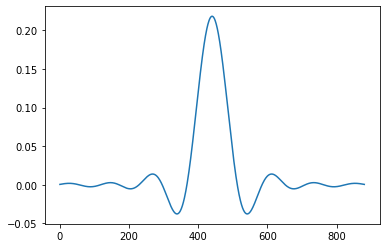

In [17]:
plt.plot(taps)

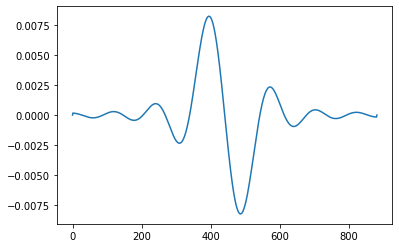

In [21]:
diff_taps = np.convolve(taps, ideal_diff_taps)
diff_taps = diff_taps[1:-1]
diff_taps[0] = diff_taps[-1] = 0
plt.plot(diff_taps)

In [22]:
np.sum(np.abs(diff_taps))

1.384012010646984

In [23]:
diff_taps *= 16 / np.sum(np.abs(diff_taps))

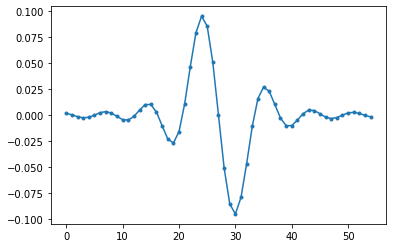

In [27]:
plt.plot(diff_taps[8::16], '.-')

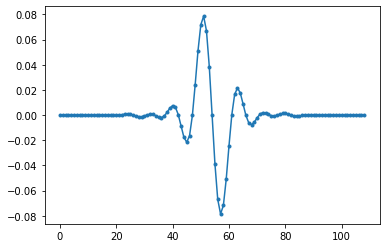

In [30]:
plt.plot(np.convolve(taps[8::16], diff_taps[8::16]), '.-')

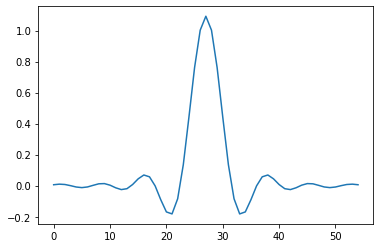

In [38]:
plt.plot(taps[8::16]*5)

In [43]:
1/5

0.2

In [45]:
np.max(-np.diff(np.convolve(5*taps[8::16], diff_taps[8::16])))

0.19281479247771072